In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [29]:
ratings = pd.read_csv('app/static/data/rating.csv')
anime = pd.read_csv('app/static/data/anime.csv')

anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [30]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [31]:
filtered_anime = anime.loc[anime['genre'].notnull() & anime['rating'].notnull() & anime['type'].notnull() & (anime['genre'].str.contains("Hentai") == False) & (anime['genre'].str.contains("Harem") == False) & (anime.type.isin(['TV', 'Movie']))]
filtered_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [32]:
filtered_anime.genre.value_counts().head()

Comedy                   249
Kids                     133
Dementia                 124
Comedy, Slice of Life     94
Comedy, Kids              86
Name: genre, dtype: int64

In [33]:
# usecase: dropdown for type (tv/movie) & genre (action, comedy, etc) then allow filtering based off that w/ a for loop or smth to go through all genre options
filtered_anime.loc[(filtered_anime['genre'].str.contains("Action") == True) & (filtered_anime['type'].str.contains("TV") == True)].head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [34]:
unique_genres = []
for anime_genre_group in filtered_anime.genre:
    for i in anime_genre_group.split(','):
        if i not in unique_genres:
            unique_genres.append(i)
print(unique_genres)

['Drama', ' Romance', ' School', ' Supernatural', 'Action', ' Adventure', ' Drama', ' Fantasy', ' Magic', ' Military', ' Shounen', ' Comedy', ' Historical', ' Parody', ' Samurai', ' Sci-Fi', 'Sci-Fi', ' Thriller', 'Comedy', ' Sports', ' Super Power', ' Slice of Life', ' Mecha', 'Adventure', ' Music', ' Mystery', ' Seinen', 'Fantasy', ' Space', ' Vampire', ' Shoujo', ' Horror', ' Police', ' Psychological', 'Mystery', 'Psychological', 'Ecchi', ' Josei', 'Josei', 'Military', 'Romance', ' Shounen Ai', ' Game', ' Martial Arts', 'Demons', ' Ecchi', ' Demons', 'Dementia', 'Game', ' Cars', ' Dementia', 'Cars', 'Music', 'Horror', 'School', ' Kids', 'Historical', 'Kids', ' Shoujo Ai', 'Mecha', 'Shoujo', 'Shounen', 'Magic', 'Martial Arts', 'Sports', 'Seinen', 'Slice of Life', 'Parody', 'Supernatural', 'Samurai']


<AxesSubplot:xlabel='type', ylabel='Count'>

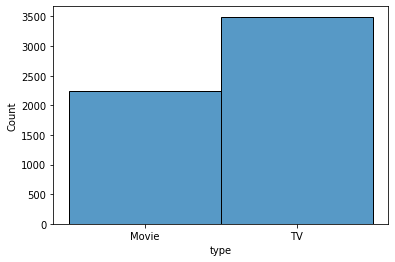

In [35]:
sns.histplot(x='type', data=filtered_anime)

In [36]:
# ratings['rating'] = ratings['rating'].apply(lambda x: np.nan if x==-1 else x)
ratings = ratings[ratings.rating != -1]
ratings = ratings[ratings.anime_id.isin(filtered_anime.anime_id)]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
83,1,11757,10
153,2,11771,10
156,3,20,8
157,3,154,6


In [37]:
filtered_ratings = ratings[ratings['user_id'].map(ratings.user_id.value_counts()) >= 50]
filtered_ratings.head()

,user_id,anime_id,rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


In [38]:
filtered_ratings.columns = ['user_id', 'anime_id', 'user_rating']
filtered_ratings.head()

,user_id,anime_id,user_rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


In [39]:
# mean_user_rating = filtered_ratings.groupby(['user_id'])['rating'].agg(['mean', 'std', 'min', 'max'])
# mean_user_rating.rename(columns={'mean':'mean_rating', 'std':'std_rating', 'min': 'min_rating', 'max': 'max_rating'}, inplace=True)
# mean_user_rating.head() 

In [40]:
# filtered_ratings = pd.merge(filtered_ratings, mean_user_rating, on='user_id')
# filtered_ratings.head()

In [41]:
# # min max normalization
# filtered_ratings['user_rating'] = ((filtered_ratings['rating'] - filtered_ratings['min_rating']) / 
#                                     (filtered_ratings['max_rating'] - filtered_ratings['min_rating'])) * 10

# # standardization
# filtered_ratings['user_rating'] = ((filtered_ratings['rating'] - filtered_ratings['mean_rating']) / filtered_ratings['std_rating'])

# percent??
# filtered_ratings['user_rating'] = (filtered_ratings['rating'] / filtered_ratings['mean_rating'])

# filtered_ratings['user_rating'] = filtered_ratings['rating']

# filtered_ratings.user_rating.describe()

In [42]:
df = pd.merge(filtered_anime, filtered_ratings, on=['anime_id','anime_id'])
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10


In [43]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df['name'] = df['name'].apply(text_cleaning)

In [44]:
rated_anime = df[['user_id', 'name', 'user_rating']]
pivot = rated_anime.pivot_table(index=['user_id'], columns=['name'], values='user_rating')
pivot.head()

name,009 Re:Cyborg,009-1,00:08,07-Ghost,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,12-gatsu no Uta,12-sai.: Chicchana Mune no Tokimeki,...,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
from scipy.sparse import csr_matrix

anime_pivot = pivot.apply(lambda x : (x - np.mean(x))/(np.max(x) - np.min(x)), axis=1).T.fillna(0)
anime_pivot = anime_pivot.loc[:, (anime_pivot != 0).any(axis=0)]

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [46]:
anime[anime['name'].str.contains("Madoka")].head()

,anime_id,name,genre,type,episodes,rating,members
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,8.51,462974
102,11981,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...,"Drama, Magic, Psychological, Thriller",Movie,1,8.50,135735
107,11979,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,"Drama, Magic, Psychological, Thriller",Movie,1,8.49,85361
217,11977,Mahou Shoujo Madoka★Magica Movie 1: Hajimari n...,"Drama, Magic, Psychological, Thriller",Movie,1,8.31,88164
3445,32153,Mahou Shoujo Madoka★Magica: Concept Movie,"Drama, Magic, Psychological, Thriller",Movie,1,6.99,5452


In [47]:
query_index = anime_pivot.index.get_loc('Mahou Shoujo Madoka★Magica')
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Mahou Shoujo Madoka★Magica:

1: Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari, with distance of 0.6474700668830751:
2: Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari, with distance of 0.6896970828381953:
3: Steins;Gate, with distance of 0.7233135387274432:
4: Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari, with distance of 0.725077565890115:
5: Suzumiya Haruhi no Shoushitsu, with distance of 0.7503636385853709:


In [64]:
to_output = anime_pivot.reset_index()
to_output[['name']].to_csv('app/static/data/anime_names.csv', index=False)

In [79]:
anime_pivot.to_csv('app/static/data/anime_pivot.csv', index=False)

In [57]:
import pickle
with open("app/static/data/anime_recommender.pkl", 'rb') as file:  
    model = pickle.load(file)

In [63]:
anime_names = pd.read_csv('app/static/data/anime_names.csv')
anime_names.head()

,Unnamed: 0,name
0,0,009 Re:Cyborg
1,1,009-1
2,2,00:08
3,3,07-Ghost
4,4,1000-nen Joou: Queen Millennia


In [78]:
anime_names[anime_names['name'] == "Death Note"].index[0]

787

In [ ]:
anime_pivot.index[]

In [80]:

try:
    query_index = anime_pivot.index.get_loc('Shingeki no Kyojin')
    distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
except:
    print("Anime not found in database.")



Recommendations for Shingeki no Kyojin:

1: Fullmetal Alchemist: Brotherhood, with distance of 0.6624645545241692:
2: Death Note, with distance of 0.6796720608940773:
3: Steins;Gate, with distance of 0.6848099393477871:
4: Code Geass: Hangyaku no Lelouch R2, with distance of 0.6965639356682611:
5: One Punch Man, with distance of 0.7071876973999371:


In [97]:
import csv
with open('app/static/data/anime_pivot.csv') as file:
    reader=csv.reader(file)
    rows=[r for r in reader]

rows[query_index]

['0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.10643977310643976',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.18655462184873958',
 '0.0',
 '0.0',
 '0.0',
 '-0.06024096385542173',
 '0.0',
 '0.0',
 '0.0',
 '-0.07692307692307694',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '-0.12637362637362642',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.08858858858858853',
 '-0.3764705882352942',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.011669203450025398',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.4375',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 

In [131]:
with open("app/static/data/anime_recommender.pkl", 'rb') as file:  
    model = pickle.load(file)

anime_names = pd.read_csv('app/static/data/anime_names.csv')

anime_name = 'Death Note'
query_index = anime_names[anime_names['name'] == anime_name].index[0]

anime = pd.read_csv('app/static/data/anime_pivot.csv', skiprows = lambda x : x != query_index + 1, nrows=1, header=None)

distances, indices = model.kneighbors(anime, n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_name))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_names.loc[indices.flatten()[i]][0], distances.flatten()[i]))


Recommendations for Death Note:

1: Code Geass: Hangyaku no Lelouch R2, with distance of 0.5849660630912039:
2: Code Geass: Hangyaku no Lelouch, with distance of 0.5889478585597274:
3: Fullmetal Alchemist: Brotherhood, with distance of 0.610282675633351:
4: Steins;Gate, with distance of 0.6641557281849576:
5: Shingeki no Kyojin, with distance of 0.6796720608940783:


In [ ]:
# sql database and then just query for the row i need by checking where the name is equal

In [82]:
anime.head()

,3,5,7,11,14,17,21,27,29,31,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.039256,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# for recommendations w/ multiple animes given
# find ratings for each anime & average them then take the top ones

# filter out names similar (eg if part of name in another name recommended)

# also as another feature add just filtering based on genre/type
# sql database and then just query for the row i need by checking where the name is equal
# load only the spceific row i need from the database if staying w/ csv

# add a readme